In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
upm = pd.read_csv('C://Users/mehto/upm.csv', sep = ';', decimal = ',')
metsä = pd.read_csv('C://Users/mehto/metsäb.csv', sep = ';', decimal = ',')

In [3]:
upm.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
0,2.12.2019,30.28,30.31,30.39,30.84,30.28,30.31,30.402,1277236,38834030.53,4000
1,29.11.2019,30.34,30.36,30.44,30.45,30.26,30.32,30.346,1089809,33073044.10,2972
2,28.11.2019,30.49,30.51,30.35,30.58,30.23,30.45,30.453,601574,18319628.25,2779
3,27.11.2019,30.47,30.49,30.53,30.74,30.38,30.38,30.470,1008072,30717233.86,2774
4,26.11.2019,30.58,30.61,30.53,30.61,30.34,30.51,30.493,1610171,49097848.83,2650


In [4]:
metsä.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
0,2.12.2019,5.960,5.970,5.960,6.120,5.950,5.97,6.023,956797,5762630.74,1957
1,29.11.2019,5.960,5.965,6.035,6.080,5.955,5.96,5.993,951118,5700351.53,1600
2,28.11.2019,6.075,6.085,6.105,6.115,5.995,6.06,6.042,885311,5348649.17,1777
3,27.11.2019,6.125,6.130,6.155,6.240,6.120,6.12,6.164,624952,3851978.46,1348
4,26.11.2019,6.170,6.175,6.255,6.305,6.120,6.16,6.182,998405,6171616.31,1543


In [5]:
upm.index = pd.to_datetime(upm['Date'],dayfirst=True)
metsä.index = pd.to_datetime(metsä['Date'],dayfirst=True)

In [6]:
upm.sort_index(inplace = True)
metsä.sort_index(inplace = True)

In [7]:
upm.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2017-12-01,1.12.2017,24.94,24.96,25.36,25.40,24.78,24.90,25.026,1540682,38556869.32,5716
2017-12-04,4.12.2017,25.07,25.09,25.25,25.33,24.97,25.05,25.128,1379509,34663877.38,4613
2017-12-05,5.12.2017,25.07,25.08,25.00,25.35,24.89,25.04,25.059,1386926,34755169.47,4438
2017-12-07,7.12.2017,25.05,25.07,24.90,25.29,24.90,25.06,25.077,2104576,52776241.40,6229
2017-12-08,8.12.2017,25.34,25.36,25.18,25.51,25.18,25.33,25.369,1145114,29050820.95,4599


In [8]:
upm.columns

Index(['Date', 'Bid', 'Ask', 'Opening price', 'High price', 'Low price',
       'Closing price', 'Average price', 'Total volume', 'Turnover', 'Trades'],
      dtype='object')

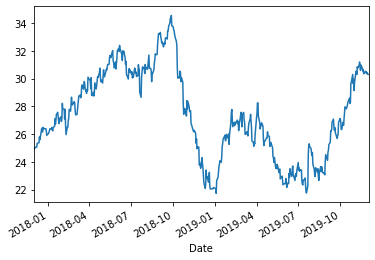

In [9]:
upm['Closing price'].plot()

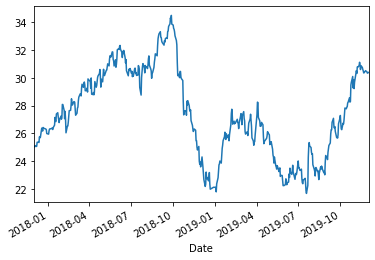

In [10]:
upm['Average price'].plot()

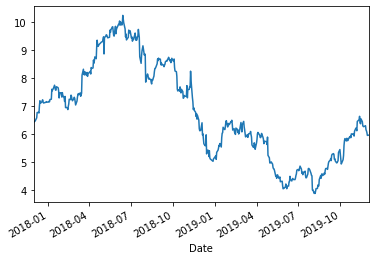

In [11]:
metsä['Closing price'].plot()

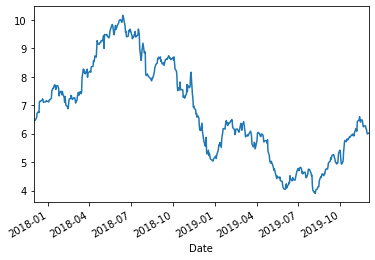

In [12]:
metsä['Average price'].plot()

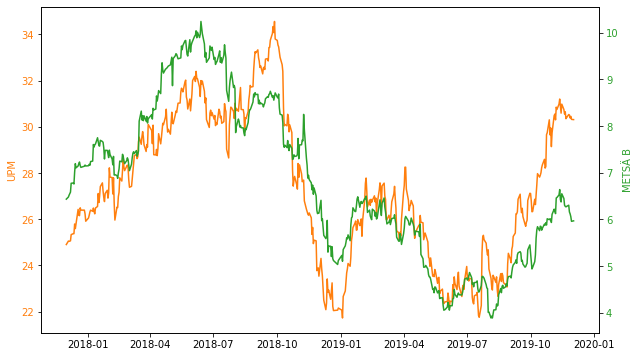

In [13]:
Kuvio1, ax1 = plt.subplots(figsize = (10, 6))

color = 'C1'
ax1.set_ylabel('UPM', color=color)
ax1.plot(upm['Closing price'], color=color)
ax1.tick_params(axis='y', labelcolor=color, grid_color=color)

ax2 = ax1.twinx()

color = 'C2'
ax2.set_ylabel('METSÄ B', color=color)
ax2.plot(metsä['Closing price'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)

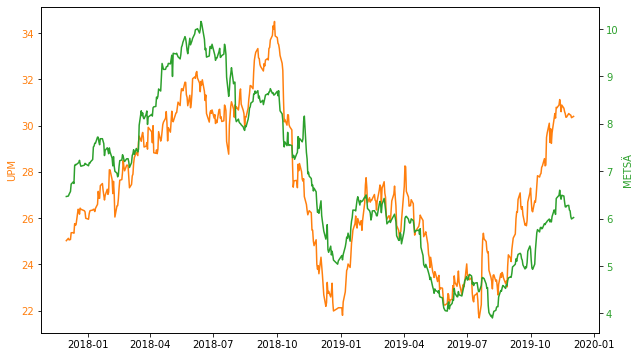

In [14]:
Kuvio2, ax1 = plt.subplots(figsize = (10, 6))

color = 'C1'
ax1.set_ylabel('UPM', color=color)
ax1.plot(upm['Average price'], color=color)
ax1.tick_params(axis='y', labelcolor=color, grid_color=color)

ax2 = ax1.twinx()

color = 'C2'
ax2.set_ylabel('METSÄ', color=color)
ax2.plot(metsä['Average price'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)


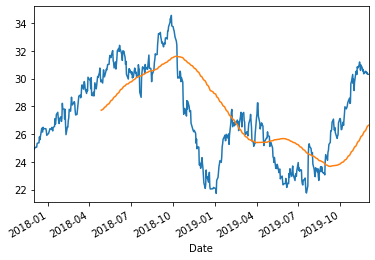

In [15]:
upm['Closing price'].plot()
upm['Closing price'].rolling(100).mean().plot()

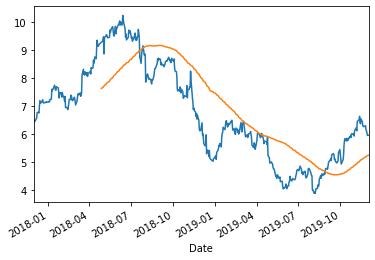

In [16]:
metsä['Closing price'].plot()
metsä['Closing price'].rolling(100).mean().plot()

In [17]:
metsä['Metsä Moving Average'] = metsä['Closing price'].rolling(100).mean()
upm['UPM Moving Average'] = upm['Closing price'].rolling(100).mean()

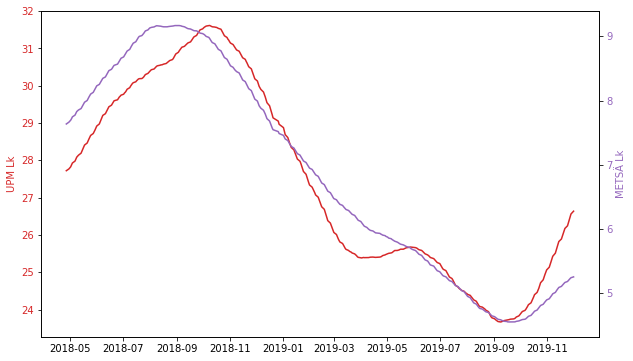

In [18]:
Kuvio2, ax1 = plt.subplots(figsize = (10, 6))

color = 'C3'
ax1.set_ylabel('UPM Lk', color=color)
ax1.plot(upm['UPM Moving Average'], color=color)
ax1.tick_params(axis='y', labelcolor=color, grid_color=color)

ax2 = ax1.twinx()

color = 'C4'
ax2.set_ylabel('METSÄ Lk', color=color)
ax2.plot(metsä['Metsä Moving Average'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)

In [19]:
upm['UPM Change'] = upm['Closing price'].pct_change()
metsä['METSÄ Change'] = metsä['Closing price'].pct_change()

In [20]:
Changes = pd.concat([upm['UPM Change'], metsä['METSÄ Change']], axis=1)

[Text(0, 0, '-15 %'),
 Text(0, 0, '-10 %'),
 Text(0, 0, '-5 %'),
 Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %')]

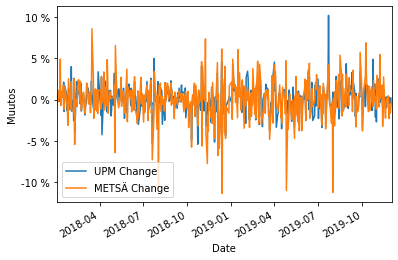

In [21]:
Kuvio3 = Changes['2018-01':].plot()
Kuvio3.set_ylabel('Muutos')
vals = Kuvio3.get_yticks()
Kuvio3.set_yticklabels(['{:.0f} %'.format(y*100) for y in vals])

In [22]:
Changes.describe()

,UPM Change,METSÄ Change
count,501.000000,501.000000
mean,0.000533,0.000133
std,0.016828,0.023662
min,-0.054118,-0.113712
25%,-0.009626,-0.012692
50%,0.000631,0.001589
75%,0.010638,0.012152
max,0.101977,0.085733


In [23]:
Changes[(Changes['UPM Change']>0.05) | (Changes['METSÄ Change']>0.05)]

,UPM Change,METSÄ Change
Date,,
2018-03-16,0.007157,0.085733
2018-05-04,-0.001326,0.065426
2018-11-08,0.001085,0.073520
2018-12-12,0.046491,0.061224
2019-01-15,0.016277,0.060415
2019-07-23,0.101977,0.041903
2019-08-16,0.022507,0.053820
2019-09-27,0.033141,0.057312
2019-10-09,0.015396,0.068702


In [24]:
Changes.corr()

,UPM Change,METSÄ Change
UPM Change,1.000000,0.606986
METSÄ Change,0.606986,1.000000


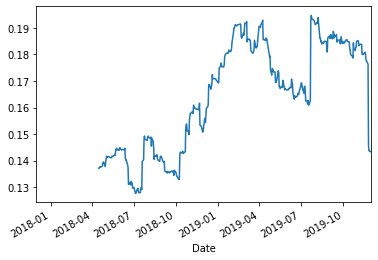

In [25]:
(Changes['UPM Change'].rolling(90).std()*(90**0.5)).plot()

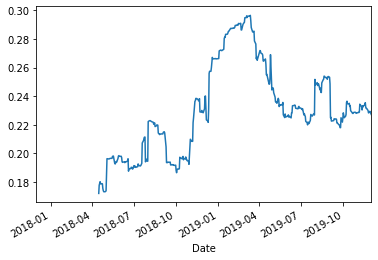

In [26]:
(Changes['METSÄ Change'].rolling(90).std()*(90**0.5)).plot()

In [27]:
Changes['Month'] = Changes.index.month

Changes.groupby('Month')['UPM Change'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,44.0,0.004131,0.013012,-0.028835,-0.004293,0.005332,0.010508,0.042818
2,40.0,0.002382,0.019121,-0.039942,-0.008836,0.004487,0.017006,0.039794
3,42.0,0.001179,0.015859,-0.037009,-0.009290,0.001948,0.011958,0.034691
4,40.0,-0.001058,0.018291,-0.042567,-0.013156,-0.000174,0.010335,0.045385
5,42.0,-0.001252,0.013998,-0.032484,-0.011437,-0.000502,0.010893,0.032008
6,39.0,0.000527,0.015417,-0.030080,-0.011581,-0.000312,0.013656,0.033006
7,45.0,0.001069,0.023115,-0.053164,-0.009726,-0.003125,0.005275,0.101977
8,45.0,0.002180,0.016167,-0.033644,-0.006181,0.000631,0.012577,0.043365
9,41.0,0.002977,0.012646,-0.021991,-0.006183,0.003092,0.008813,0.033141
